In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [99]:
data_folder = 'galaxyData/'
g_files = glob.glob(data_folder + "*") #This command grabs all of the
#files starting with "sun_az" in your data folder.
g_files.sort()

In [100]:
print(g_files)

['galaxyData/calib_pole.dat', 'galaxyData/galpos00.dat', 'galaxyData/galpos10.dat', 'galaxyData/galpos20.dat', 'galaxyData/galpos30.dat', 'galaxyData/galpos40.dat', 'galaxyData/galpos50.dat', 'galaxyData/galpos60.dat', 'galaxyData/galpos70.dat', 'galaxyData/galpos80.dat', 'galaxyData/galpos90.dat']


In [244]:
g_spectra = [] 
# Create an empty array to later hold each of the 
#spectra from the azimuthal scans

for g_file in g_files: 
    #Pull each individual filename from the list of azimuth files
    
    with open(g_file) as g_data: 
        #This opens up the file and puts each line into a list called 
        #az_data
        
        spectrum_rows = []    # We create a new empty list to put the 
        #rows with our spectral data into.
        
        for j, row in enumerate(g_data, start=1): # enumerate() works 
            #a lot like range(). You get an index (j, here) which is 
            #iterated over, but you also get an object (row) 
            #corresponding to the items in the list you're iterating 
            #over (that is, inside this loop, row is the same as 
            #az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. 
                #It returns the remainder of a division (e.g. 6%4=2).
                #So, by checking when j%4 is zero, we get every fourth 
                #row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into 
                #our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings.
            #To break them up, we use the split() command, which splits
            #a string into a list by grabbing each segment separated by
            #the delimiter you put in the parentheses (e.g. If you do
            #'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your
                #split list.
                if val != '' and val != '\n': 
                    # This excludes some "nonsense" cases where 
                    #elements in your split list are empty strings 
                    #or end-of-line characters
                    spec.append(val) 
                    #Throw the values that are actually fluxes 
                    #into your spectrum array.
                    
                    
            tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows)
            # Add the data from the current row to your total 
            #spectral data for this file.
            
        g_spectra.append(tot_spectrum)
        

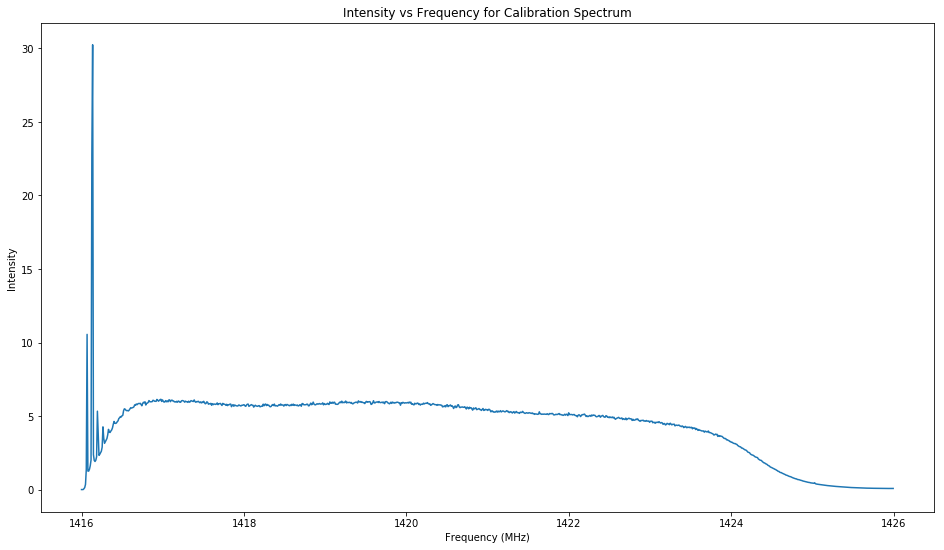

In [247]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq,g_spectra[0])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for Calibration Spectrum")
plt.show()

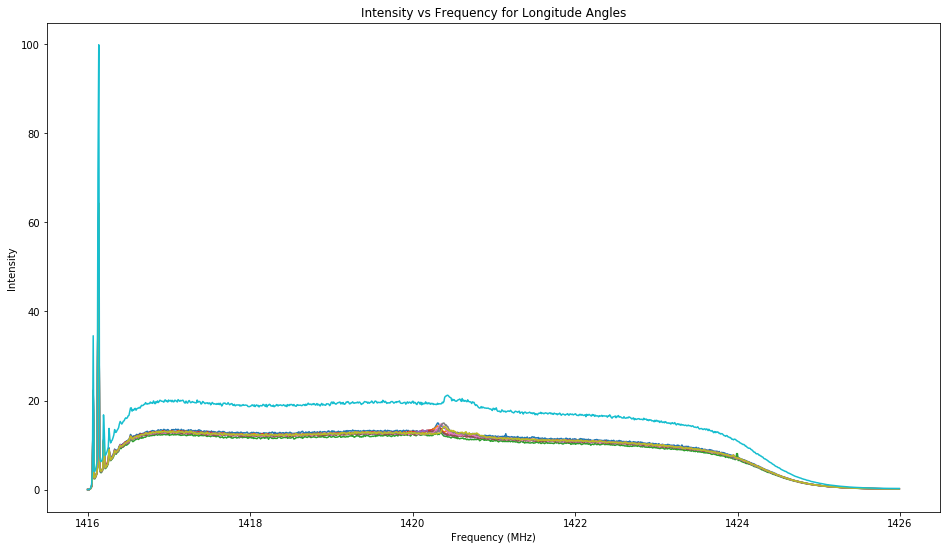

1421.0001919999486


In [248]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
for i in range (1,11):
    plt.plot(freq,g_spectra[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for Longitude Angles")
plt.show()
print(freq[512])

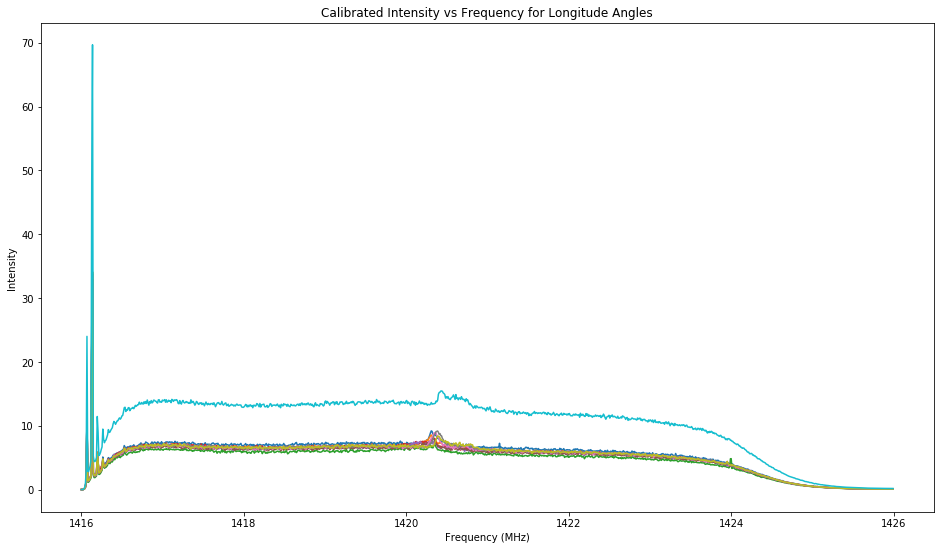

In [307]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
polemean = np.mean(g_spectra[0])
g_spectra1 = np.subtract(g_spectra,g_spectra[0])
for i in range (1,11):
    plt.plot(freq,g_spectra1[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Calibrated Intensity vs Frequency for Longitude Angles")
plt.show()

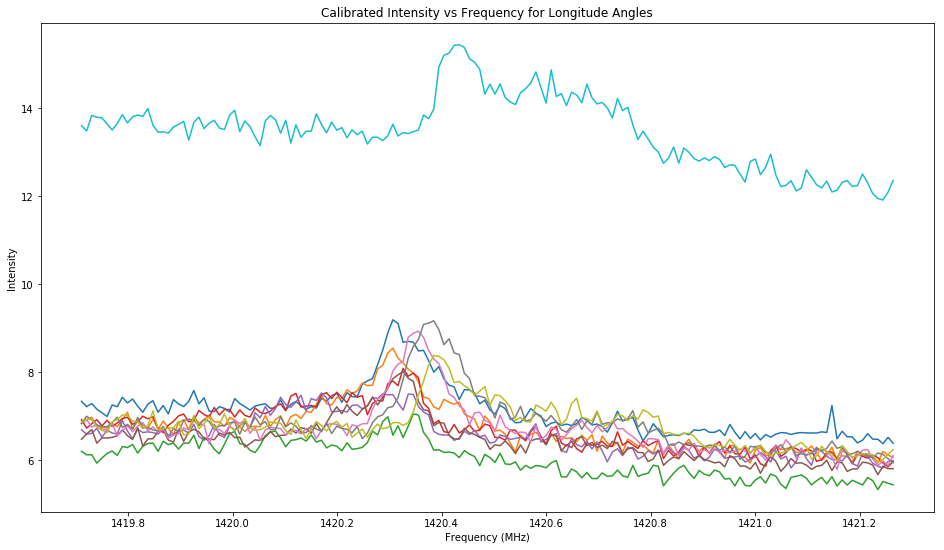

In [308]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
for i in range (1,11):
    plt.plot(freq[380:540],g_spectra1[i][380:540])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Calibrated Intensity vs Frequency for Longitude Angles")
plt.show()

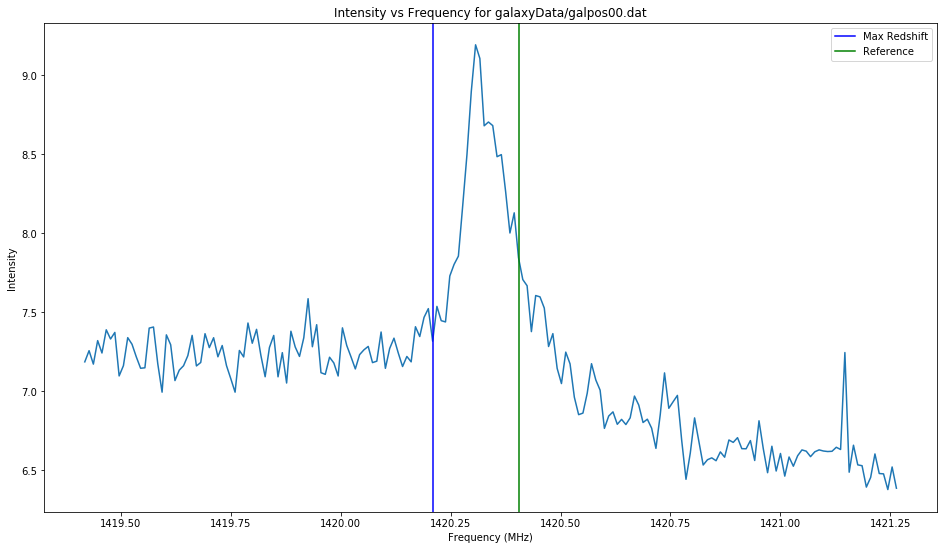

In [309]:
n=0
line = 1420.21
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr = np.zeros(10)
freqr[n] = line

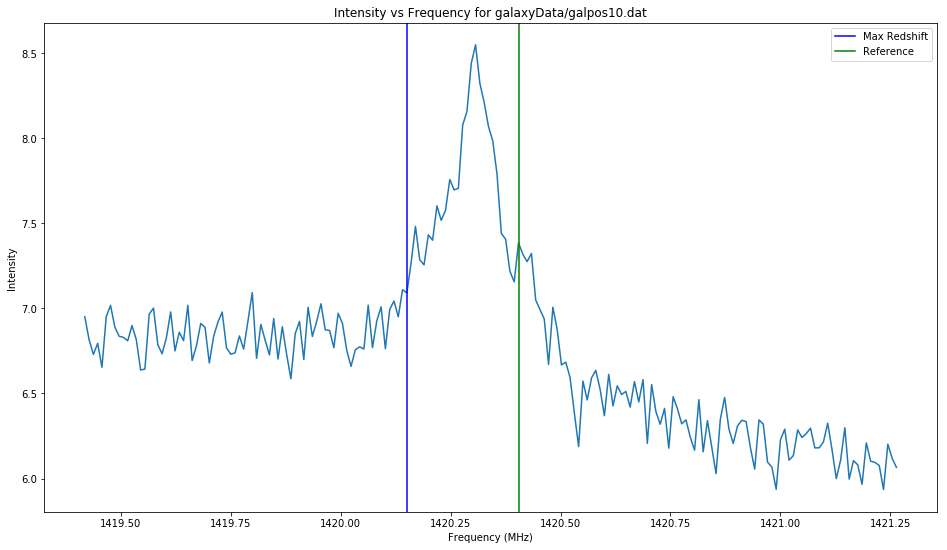

In [310]:
n=1
line = 1420.15
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

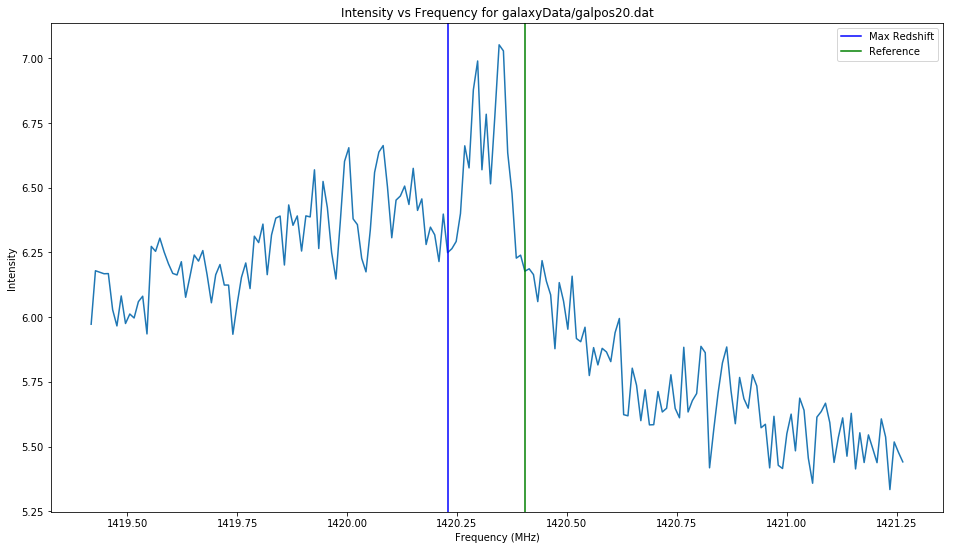

In [311]:
n=2
line = 1420.23
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

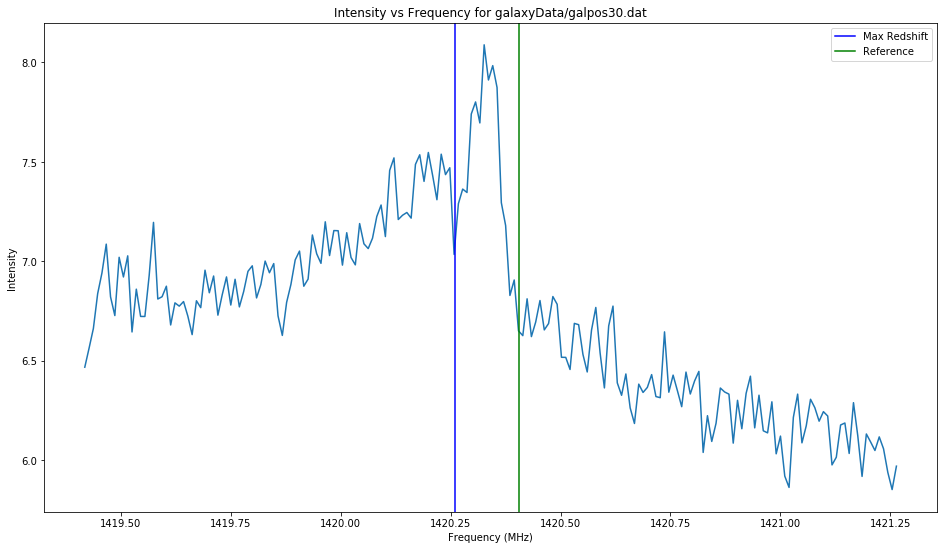

In [312]:
n=3
line = 1420.26
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

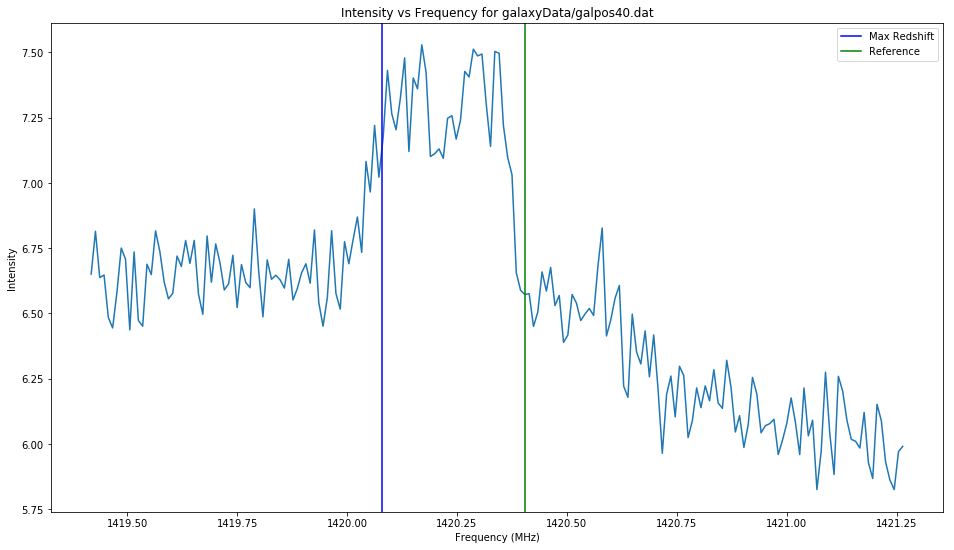

In [313]:
n=4
line = 1420.08
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

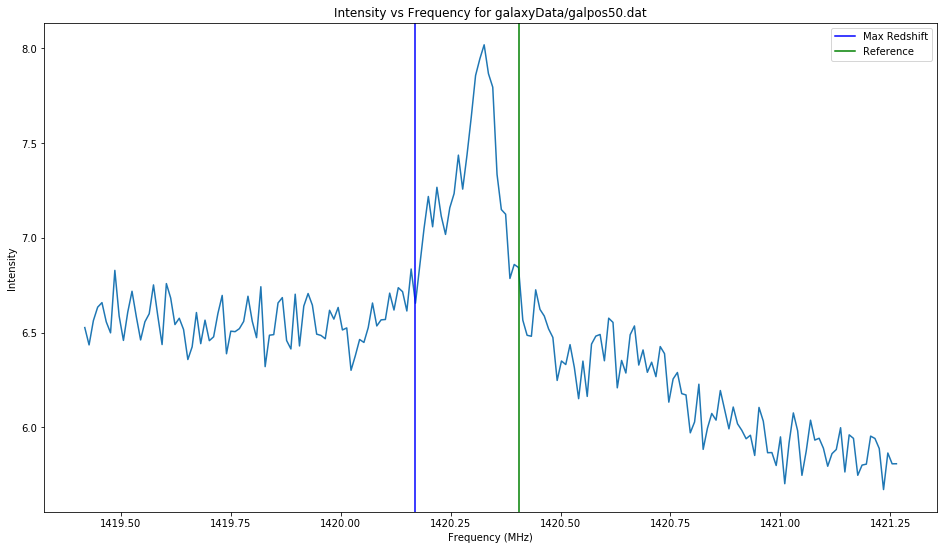

In [314]:
n=5
line = 1420.17
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

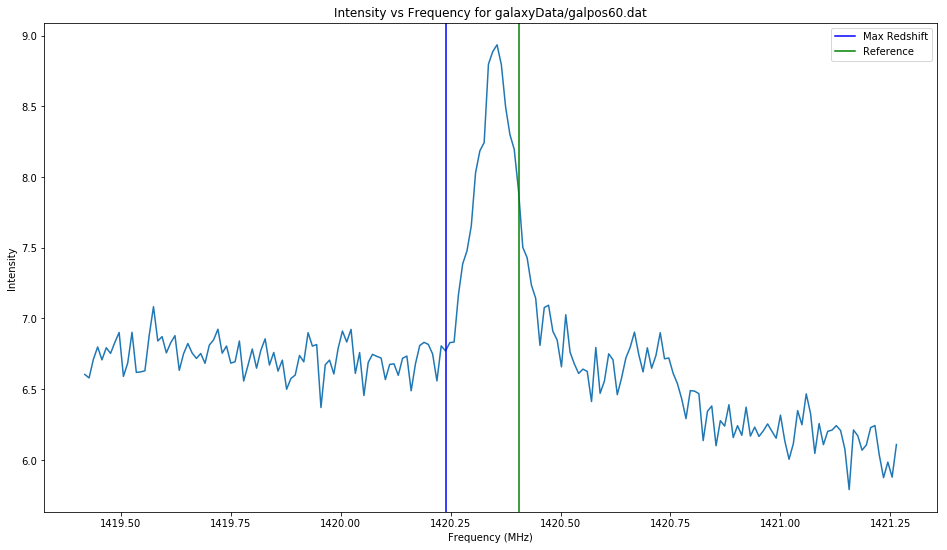

In [315]:
n=6
line = 1420.24
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

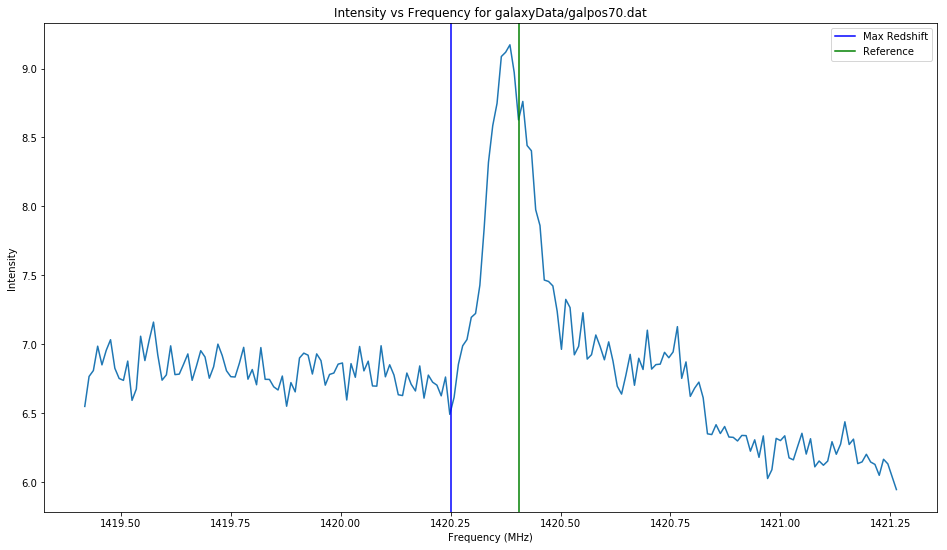

In [316]:
n=7
line = 1420.25
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

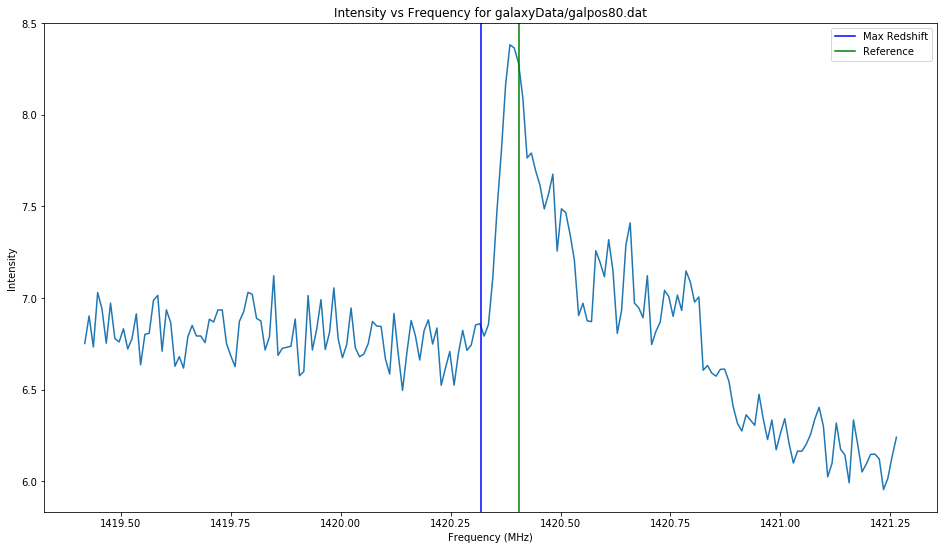

In [317]:
n=8
line = 1420.32
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

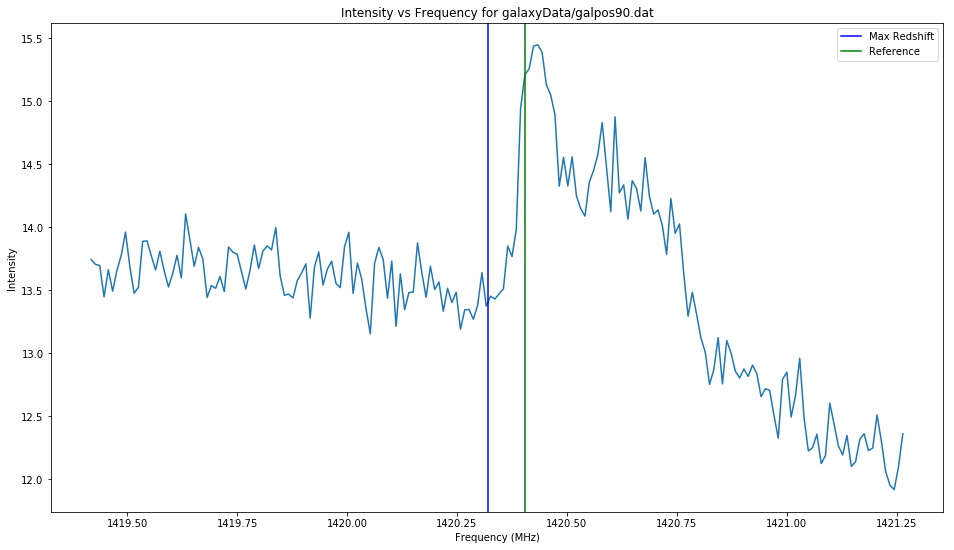

In [318]:
n=9
line = 1420.32
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
plt.plot(freq[350:540],g_spectra1[n+1][350:540])
reference = 1420.4057517700053
plt.axvline(line, color = 'b', label='Max Redshift')
plt.axvline(reference, color = 'g', label='Reference')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for %s" % (g_files[n+1]))
plt.legend()
plt.show()
freqr[n] = line

Doppler Velocities = [41.31559184 53.97926027 37.09436903 30.76253481 68.75354011 49.75803746
 34.98375762 32.87314622 18.09886638 18.09886638]
Actual Velocities = [ 30.83559184  88.43427521 115.41790961 150.59253481 226.4629381
 240.55257935 253.06344067 271.61270304 270.24180495 275.97886638]
Frequencies = [1420.21 1420.15 1420.23 1420.26 1420.08 1420.17 1420.24 1420.25 1420.32
 1420.32]


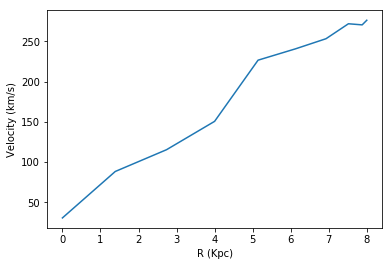

In [319]:
vknotsun = 255.2
Vproj = vknotsun*np.sin(x*np.pi/180)
vact = c/(.2110611405413/1000)/10**6
c = 2.99792458*10**5
deltav = c-c*freqr/vact
vlsr = (10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68)
deltavfixed = deltav-vlsr+Vproj
Rknot = 8
x = np.arange(0,100,10)
R = Rknot*np.sin(x*np.pi/180)
print("Doppler Velocities = %s" % (deltav))
print("Actual Velocities = %s" % (deltavfixed))
print("Frequencies = %s" % (freqr))
plt.plot(R,deltavfixed)

plt.xlabel('R (Kpc)')
plt.ylabel('Velocity (km/s)')
plt.show()
